In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Train Data

In [3]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### drop duplicate/unimportant columns

In [5]:
train = train.drop(["Name", "Ticket", "Fare", "Embarked", "Cabin"], axis=1)
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0
...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0
887,888,1,1,female,19.0,0,0
888,889,0,3,female,NaN,1,2
889,890,1,1,male,26.0,0,0


### check for Null values

In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
dtype: int64

In [7]:
#train["Cabin"].unique()
#train["Cabin"] = train["Cabin"].fillna(0)
#train


### fill null values in Age 
### calc avg age of men, women

In [8]:
female = (train["Sex"] == "female")
female.sum()
avg_age_female = (train[female]["Age"].mean())
round(avg_age_female,1) 
train_female = (train[female]["Age"]).fillna(value=avg_age_female)
train_female.astype('int')

1      38
2      26
3      35
8      27
9      14
       ..
880    25
882    22
885    39
887    19
888    27
Name: Age, Length: 314, dtype: int64

In [9]:
male = (train["Sex"] == "male")
male.sum()
avg_age_male = (train[male]["Age"].mean())
round(avg_age_male,1) 
train_male = (train[male]["Age"]).fillna(value=avg_age_male)
train_male.astype('int')

0      22
4      35
5      30
6      54
7       2
       ..
883    28
884    25
886    27
889    26
890    32
Name: Age, Length: 577, dtype: int64

### concat male, female in Age column

In [10]:
train["Age"] = pd.concat([train_female, train_male])
train["Age"] = train["Age"].astype('int')
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22,1,0
1,2,1,1,female,38,1,0
2,3,1,3,female,26,0,0
3,4,1,1,female,35,1,0
4,5,0,3,male,35,0,0
...,...,...,...,...,...,...,...
886,887,0,2,male,27,0,0
887,888,1,1,female,19,0,0
888,889,0,3,female,27,1,2
889,890,1,1,male,26,0,0


In [11]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
dtype: int64

# Exploratory Data Analysis

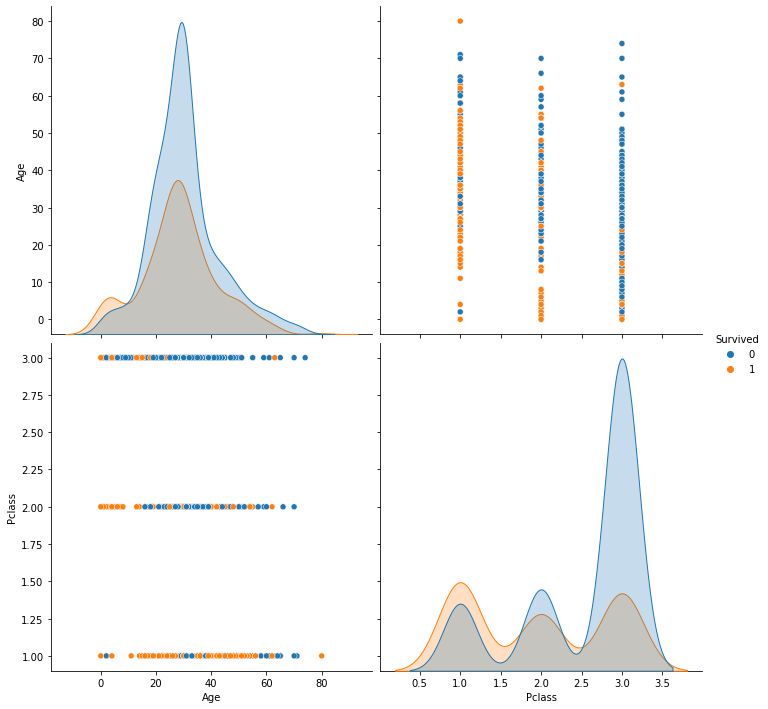

In [12]:
sns.pairplot(train[["Age", "Pclass", "Survived"]], height=5, hue = "Survived")
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='Count'>

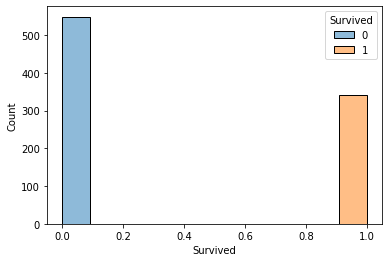

In [13]:
sns.histplot(data=train, x="Survived", hue = "Survived")

<AxesSubplot:xlabel='Survived', ylabel='Age'>

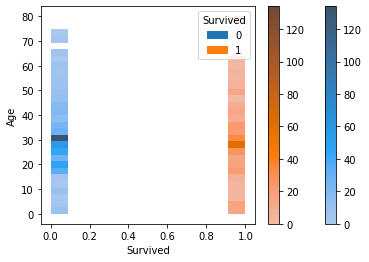

In [14]:
sns.histplot(data=train, y="Age", x="Survived", hue = "Survived", cbar=True)

<AxesSubplot:xlabel='Survived', ylabel='Sex'>

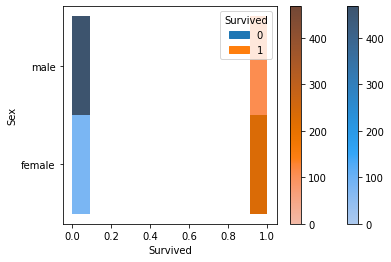

In [15]:
sns.histplot(data=train, y="Sex", x="Survived", hue = "Survived", cbar=True)

<AxesSubplot:xlabel='Survived', ylabel='SibSp'>

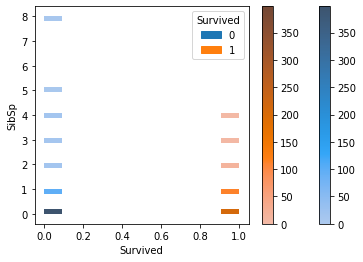

In [16]:
sns.histplot(data=train, y="SibSp", x="Survived", hue = "Survived", cbar=True)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

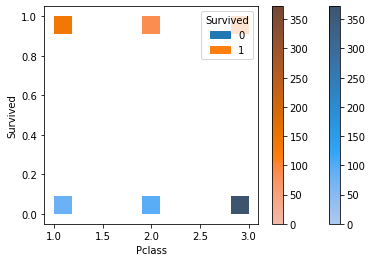

In [17]:
sns.histplot(data=train, x="Pclass", y="Survived", hue = "Survived", cbar=True)

### Dummy encoding

In [18]:
train_encoded = pd.get_dummies(train)
#train = train_encoded.drop(["Sex_male"], axis=1)
train = train_encoded
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male
0,1,0,3,22,1,0,0,1
1,2,1,1,38,1,0,1,0
2,3,1,3,26,0,0,1,0
3,4,1,1,35,1,0,1,0
4,5,0,3,35,0,0,0,1
...,...,...,...,...,...,...,...,...
886,887,0,2,27,0,0,0,1
887,888,1,1,19,0,0,1,0
888,889,0,3,27,1,2,1,0
889,890,1,1,26,0,0,0,1


### X_train, y_train from train data (before subsetting into validation set)

In [19]:
X_train_dataset = train.drop(["Survived"], axis = 1)
X_train_dataset

,PassengerId,Pclass,Age,SibSp,Parch,Sex_female,Sex_male
0,1,3,22,1,0,0,1
1,2,1,38,1,0,1,0
2,3,3,26,0,0,1,0
3,4,1,35,1,0,1,0
4,5,3,35,0,0,0,1
...,...,...,...,...,...,...,...
886,887,2,27,0,0,0,1
887,888,1,19,0,0,1,0
888,889,3,27,1,2,1,0
889,890,1,26,0,0,0,1


In [20]:
y_train_dataset = train["Survived"]
y_train_dataset

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Validation Data Set

In [21]:
X = train.drop(["Survived"], axis=1)
X

,PassengerId,Pclass,Age,SibSp,Parch,Sex_female,Sex_male
0,1,3,22,1,0,0,1
1,2,1,38,1,0,1,0
2,3,3,26,0,0,1,0
3,4,1,35,1,0,1,0
4,5,3,35,0,0,0,1
...,...,...,...,...,...,...,...
886,887,2,27,0,0,0,1
887,888,1,19,0,0,1,0
888,889,3,27,1,2,1,0
889,890,1,26,0,0,0,1


In [22]:
y=train["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=0)
#X_train.values.reshape(-1, 1)
#y_train.values.reshape(-1, 1)
#X_test.values.reshape(-1, 1)
#y_test.values.reshape(-1, 1) 

# Preprocessing Standardisation

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train, y_train)
X_test_scaled = scaler.transform(X_test)


# preprocessing standardisation of complete train set

In [25]:
X_train_dataset_scaled = scaler.fit_transform(X_train_dataset, y_train_dataset)


# Model1: LogisticRegression 

In [26]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_scaled, y_train)
y_pred_lr = logisticRegr.predict(X_test_scaled)
y_pred_lr

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [27]:
logisticRegr.score(X_test_scaled, y_test)

0.8044692737430168

In [28]:
accuracy_score(y_test, y_pred_lr)

0.8044692737430168

In [29]:
f1_score(y_test, y_pred_lr)

0.748201438848921

# KNeighborsClassifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
y_pred_knn

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [31]:
knn.score(X_test_scaled, y_test)

0.8324022346368715

In [32]:
 accuracy_score(y_test, y_pred_knn)

0.8324022346368715

In [33]:
f1_score(y_test, y_pred_knn)

0.7727272727272727

# Decision Tree classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
y_pred_dt

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [35]:
dt.score(X_test_scaled, y_test)

0.7932960893854749

In [36]:
accuracy_score(y_test, y_pred_dt)

0.7932960893854749

In [37]:
f1_score(y_test, y_pred_dt)

0.7375886524822696

# RandomForest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1, max_depth=14)
rfc.fit(X_train_scaled, y_train)
y_pred_rfc = rfc.predict(X_test_scaled)
y_pred_rfc 

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [39]:
rfc.score(X_test_scaled, y_test)

0.7541899441340782

In [40]:
accuracy_score(y_test, y_pred_rfc)

0.7541899441340782

In [41]:
f1_score(y_test, y_pred_rfc)

0.6716417910447761

# NaiveBayes Classification

In [42]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
y_pred_gnb = gnb.predict(X_test_scaled)
y_pred_gnb

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [43]:
gnb.score(X_test_scaled, y_test)

0.7877094972067039

In [44]:
accuracy_score(y_test, y_pred_gnb)

0.7877094972067039

In [45]:
f1_score(y_test, y_pred_gnb)

0.7164179104477613

# Support Vector Machine

In [46]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
y_pred_svm

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [47]:
svm.score(X_test_scaled, y_test)

0.8212290502793296

In [48]:
accuracy_score(y_test, y_pred_svm)

0.8212290502793296

In [49]:
f1_score(y_test, y_pred_svm)

0.7575757575757576

# Gradient Boosting Classifier

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
gboost = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
gboost.fit(X_train_scaled, y_train)
y_pred_gboost = gboost.predict(X_test_scaled)
y_pred_gboost

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [51]:
gboost.score(X_test_scaled, y_test)

0.7988826815642458

In [52]:
accuracy_score(y_pred_gboost, y_test)

0.7988826815642458

In [53]:
f1_score(y_pred_gboost, y_test)

0.7230769230769231

# Test Data from Kaggle


In [54]:
test= pd.read_csv("/kaggle/input/titanic/test.csv")
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [55]:
test = test.drop(["Name", "Ticket", "Fare", "Embarked", "Cabin"], axis=1)
test


,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,male,34.5,0,0
1,893,3,female,47.0,1,0
2,894,2,male,62.0,0,0
3,895,3,male,27.0,0,0
4,896,3,female,22.0,1,1
...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0
414,1306,1,female,39.0,0,0
415,1307,3,male,38.5,0,0
416,1308,3,male,NaN,0,0


In [56]:
test.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
dtype: int64

In [57]:
female = (test["Sex"] == "female")
female.sum()
avg_age_female = (test[female]["Age"].mean())
round(avg_age_female,1) 
test_female = (test[female]["Age"]).fillna(value=avg_age_female)
test_female.astype('int')

1      47
4      22
6      30
8      18
12     23
       ..
409     3
410    30
411    37
412    28
414    39
Name: Age, Length: 152, dtype: int64

In [58]:
male = (test["Sex"] == "male")
male.sum()
avg_age_male = (test[male]["Age"].mean())
round(avg_age_male,1) 
test_male = (test[male]["Age"]).fillna(value=avg_age_male)
test_male.astype('int')

0      34
2      62
3      27
5      14
7      26
       ..
407    50
413    30
415    38
416    30
417    30
Name: Age, Length: 266, dtype: int64

In [59]:
test["Age"] = pd.concat([test_female, test_male])
test["Age"] = test["Age"].astype('int')
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,male,34,0,0
1,893,3,female,47,1,0
2,894,2,male,62,0,0
3,895,3,male,27,0,0
4,896,3,female,22,1,1
...,...,...,...,...,...,...
413,1305,3,male,30,0,0
414,1306,1,female,39,0,0
415,1307,3,male,38,0,0
416,1308,3,male,30,0,0


In [60]:
test_encoded = pd.get_dummies(test)
test = test_encoded
test

,PassengerId,Pclass,Age,SibSp,Parch,Sex_female,Sex_male
0,892,3,34,0,0,0,1
1,893,3,47,1,0,1,0
2,894,2,62,0,0,0,1
3,895,3,27,0,0,0,1
4,896,3,22,1,1,1,0
...,...,...,...,...,...,...,...
413,1305,3,30,0,0,0,1
414,1306,1,39,0,0,1,0
415,1307,3,38,0,0,0,1
416,1308,3,30,0,0,0,1


In [61]:
X = test
X

#y = test["Survived"]
#y


,PassengerId,Pclass,Age,SibSp,Parch,Sex_female,Sex_male
0,892,3,34,0,0,0,1
1,893,3,47,1,0,1,0
2,894,2,62,0,0,0,1
3,895,3,27,0,0,0,1
4,896,3,22,1,1,1,0
...,...,...,...,...,...,...,...
413,1305,3,30,0,0,0,1
414,1306,1,39,0,0,1,0
415,1307,3,38,0,0,0,1
416,1308,3,30,0,0,0,1


In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train_dataset_scaled, y_train_dataset)
target = knn.predict(X_scaled)
target

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [64]:
test["Survived"] = target
Submission = test[["PassengerId", "Survived"]]
Submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [65]:
Submission.to_csv('Submission.csv', index=False)
